## Diffusion Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### DLA algorithm
- Initialize with a flat solid with a finite thickness in the bottom of the domain
- Keep on doing this:
    - Generate random walkers at random position away from the initial flat solid
    - Walk randomly until the neighbourhood of a random walker is a solid. Then make the random walker also a solid.

In [2]:
def initialize_particle(y_start):
    # initialize a random walker at a random position at y_start from the initial thickness, x can lie anywhere within the domain
    x =  1+ 298*np.random.random()
    y =  10 + y_start
    return int(x), int(y) # these are indices of array, so they should always be integers

#As the name suggests, this function helps in checking whether the neighbours of the cell of interest are solid or liquid.
def check_neighbour(x, y):
    if phase[x,y-1]==0 and phase[x,y+1]==0 and phase[x-1,y]==0 and phase[x+1,y]==0:
        return "liquid"
    else:
        return "solid"
    
#To make sure that the cell of interest is always inside the domain
def check_boundary(x, y):
    if 1 < x < mesh_x-1 and 1 < y < mesh_y-1:
        return "inside"
    else:
        return "outside"


#Random Walker Code
def random_walk(x, y):
    random_number = np.random.random()
    #As we are dealing with 2D lattice, we have 4 nearest neighbours, with equal probabilities of jump
    if random_number < 0.25:
        x, y = x-1, y # turn left
    elif random_number < 0.5:
        x, y = x+1, y # turn right
    elif random_number < 0.75:
        x, y = x, y+1 # turn up
    else:
        x, y = x, y-1 # turn down
    return x, y

#This function helps in updating the domain, whenever a random walker reaches the thickness
def update_r(x, y, y_max_solid, y_start_rw):
    if y > y_max_solid:
        y_max_solid = y
        y_start_rw = y_max_solid + 10
    return y_max_solid, y_start_rw

In [3]:
mesh_x = 300
mesh_y = mesh_x
phase = np.zeros( (mesh_x, mesh_y) ) # all is liquid
# 0 = liquid, > 0 = solid
for i in range(mesh_x):
    for j in range(10):
        #The value is given as 2000, just for the colour contrast between the solid and liquid in the final plot
        phase[i,j]=1000

y_max_solid = 10 #Initial thickness of the solid
y_start_rw = y_max_solid + 10 # initiating the randomwalker at the distance 10 from the initial solid
count_solid_particles = 1000
#Here also it starts at 2000, for the better colour contrast, actual number of solid particles is 2000 minus the value stored in this variable
for l in range(9500):
    #Initializing random walker
    x, y = initialize_particle(y_start_rw)
    while check_neighbour(x, y) == "liquid":
        #Random walking until reaching the solid
        x, y = random_walk(x, y)
        if check_boundary(x, y) == "outside":
            break
        if check_neighbour(x, y) == "solid":
            #Once reaching the solid, updating the domain, adding the new cell as solid
            count_solid_particles += 1
            phase[x, y] = count_solid_particles
            y_max_solid, y_start_rw = update_r(x, y, y_max_solid, y_start_rw)
            break

### Plot

In [4]:
#This is just to make it look like, bottom part is solid and it grows from bottom, just for visualization purposes
phase1 = np.zeros( (mesh_x, mesh_y) )
for i in range(mesh_x):
    for j in range(mesh_y):
        phase1[299-i,j]=phase[j,i]

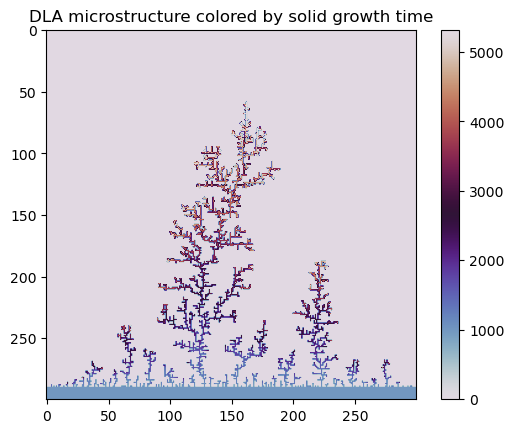

In [5]:
plt.imshow(phase1,cmap='twilight')
plt.title('DLA microstructure colored by solid growth time')
plt.colorbar()
plt.show()